## Barbenheimber and Socioeonomic and Political Analysis
#### Matt Graham

Why bother doing this?

A few visuals have popped up on the internet during the height of the release of Barbie and Oppenheimer. They grossed $MM.KM and $MM.KM respectively.

I want to first test and see if there is any correlation between the trends of these movies and respective political pull points. We can then expand it to socioeconomic metrics. We will keep these high level, focusing on states. This unfortunately ignores important nuances of gerrymandering to suppress the votes of Black and Women voters. 

In [1]:
from pytrends.request import TrendReq
from pytrends.exceptions import TooManyRequestsError
from urllib3.connection import ConnectTimeoutError
import examples.analysis.state_leg_gdp_analysis.states as states
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

### Getting Barbenheimer trends (last 90 days)

In [31]:
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(15,25), proxies=['https://34.203.233.13:80',], retries=5, backoff_factor=0.2, requests_args={'verify':False})

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
def get_payload(kw_list, state):
    # pytrends = TrendReq(hl='en-US', tz=360)
    # try:
    #     pytrends = TrendReq(hl='en-US', tz=360)
    try:
        time.sleep(5)
        pytrends.build_payload(kw_list, cat=0, timeframe='today 3-m', geo=f'US-{state}', gprop='')
        print(f"Getting time series trend data")
        try:
            time.sleep(5)
            state_data = pytrends.interest_over_time()
            state_data['state'] = state
            print(f"{state} series gathered")
            return state_data
        except TooManyRequestsError:
            print(f'Trying {state} again (inside payload except)')
            time.sleep(5)
            state_data = pytrends.interest_over_time()
            state_data['state'] = state
            print(f"{state} series gathered")
            return state_data
            
    except TooManyRequestsError:
        print(f'Trying {state} again (outside payload except)')
        time.sleep(5)
        state_data = pytrends.interest_over_time()
        state_data['state'] = state
        print(f"{state} series gathered")
        return state_data
    # except ConnectTimeoutError:
    #     print(f'Pytrend connection failed')
    #     time.sleep(5)

In [4]:
kw_list = ["Oppenheimer","Barbie"]
states_df = pd.Series(states.us_state_to_abbrev).reset_index()
raw_df = pd.DataFrame(columns=['date', 'Oppenheimer', 'Barbie', 'state'])


In [35]:
while True:
    for index, row in states_df.iterrows():
        state = row[0]
        print(f'Getting {state}')
        try:
            state_data = get_payload(kw_list, state)
            raw_df = pd.concat([raw_df, state_data])
        except TooManyRequestsError:
            print(f"Retrying {state} in 5 seconds (Main too many tries)")
            time.sleep(5)
            state_data = get_payload(kw_list, state)
            raw_df = pd.concat([raw_df, state_data])
        except ConnectTimeoutError:
            print(f"Retrying {state} in 5 seconds (Main connection timeout)")
            time.sleep(5)
            state_data = get_payload(kw_list, state)
            raw_df = pd.concat([raw_df, state_data])
        print(f'{state} complete')

Getting AL
Getting time series trend data
AL series gathered
AL complete
Getting AK
Getting time series trend data
AK series gathered
AK complete
Getting AZ
Getting time series trend data
AZ series gathered
AZ complete
Getting AR
Getting time series trend data
AR series gathered
AR complete
Getting CA
Getting time series trend data
CA series gathered
CA complete
Getting CO
Getting time series trend data
CO series gathered
CO complete
Getting CT
Getting time series trend data
CT series gathered
CT complete
Getting DE
Getting time series trend data
DE series gathered
DE complete
Getting FL
Getting time series trend data
FL series gathered
FL complete
Getting GA
Getting time series trend data
GA series gathered
GA complete
Getting HI
Getting time series trend data
HI series gathered
HI complete
Getting ID
Getting time series trend data
ID series gathered
ID complete
Getting IL
Getting time series trend data
IL series gathered
IL complete
Getting IN
Getting time series trend data
IN series

ResponseError: The request failed: Google returned a response with code 400

In [2]:
# df = raw_df
# df.to_pickle('./barbenheimer.pkl')

df = pd.read_pickle('./barbenheimer.pkl')

### Barbenheimer EDA

In [3]:
df.describe()

,date,Oppenheimer,Barbie,state,isPartial
count,0,4539,4539,4539,4539
unique,0,73,100,51,1
top,NaN,1,3,AL,False
freq,NaN,1114,538,89,4539


In [4]:
df['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'], dtype=object)

In [8]:
df.dtypes

date           object
Oppenheimer    object
Barbie         object
state          object
isPartial      object
dtype: object

In [6]:
df['Barbie'] = df['Barbie'].astype('int')
df['Oppenheimer'] = df['Oppenheimer'].astype('int')
df['isPartial'] = df['isPartial'].astype('boolean')
df['date'] = 
df.dtypes

TypeError: data type 'datetime' not understood

In [10]:
df['barbie_r7avg'] = df['Barbie'].rolling(window=7).mean()
df['oppen_r7avg'] = df['Oppenheimer'].rolling(window=7).mean()
df['barbie_r3avg'] = df['Barbie'].rolling(window=3).mean()
df['oppen_r3avg'] = df['Oppenheimer'].rolling(window=3).mean()
df['barbie_r7med'] = df['Barbie'].rolling(window=7).median()
df['oppen_r7med'] = df['Oppenheimer'].rolling(window=7).median()
df['barbie_r3med'] = df['Barbie'].rolling(window=3).median()
df['oppen_r3med'] = df['Oppenheimer'].rolling(window=3).median()
df['date'] = df.index
df

,date,Oppenheimer,Barbie,state,isPartial,barbie_r7avg,oppen_r7avg,barbie_r3avg,oppen_r3avg,barbie_r7med,oppen_r7med,barbie_r3med,oppen_r3med
2023-05-03,2023-05-03,1,2,AL,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-04,2023-05-04,0,3,AL,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-05,2023-05-05,1,4,AL,False,NaN,NaN,3.000000,0.666667,NaN,NaN,3.0,1.0
2023-05-06,2023-05-06,1,3,AL,False,NaN,NaN,3.333333,0.666667,NaN,NaN,3.0,1.0
2023-05-07,2023-05-07,1,1,AL,False,NaN,NaN,2.666667,1.000000,NaN,NaN,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,2023-07-26,20,38,DC,False,62.285714,41.000000,51.000000,29.333333,65.0,43.0,45.0,25.0
2023-07-27,2023-07-27,19,36,DC,False,61.428571,39.000000,39.666667,21.333333,65.0,43.0,38.0,20.0
2023-07-28,2023-07-28,26,38,DC,False,57.571429,36.000000,37.333333,21.666667,45.0,26.0,38.0,20.0
2023-07-29,2023-07-29,32,52,DC,False,50.714286,31.428571,42.000000,25.666667,45.0,26.0,38.0,26.0


<AxesSubplot:>

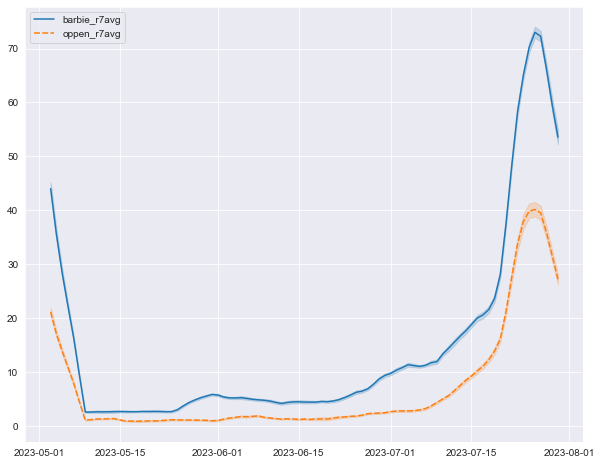

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df[['barbie_r7avg', 'oppen_r7avg']])

<AxesSubplot:>

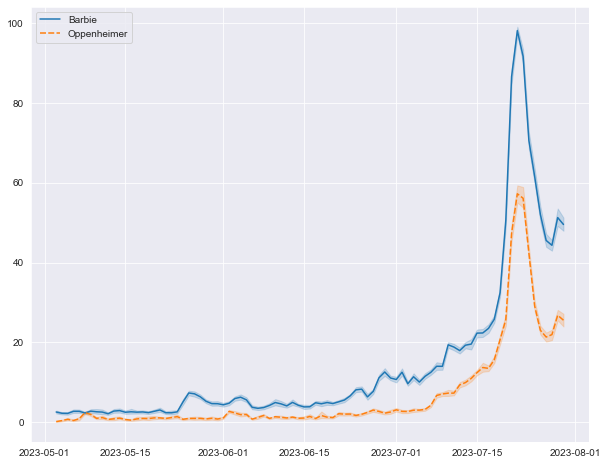

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df[['Barbie', 'Oppenheimer']])

In [13]:
state_summary = df.groupby(["state", "date"]).mean(numeric_only=True)
state_summary

Oppenheimer  Barbie  isPartial  barbie_r7avg  oppen_r7avg  \
state date                                                                    
AK    2023-05-03          0.0     0.0        0.0     36.428571    16.142857   
      2023-05-04          0.0     0.0        0.0     28.714286    13.000000   
      2023-05-05          0.0     0.0        0.0     22.571429    10.571429   
      2023-05-06          0.0     6.0        0.0     17.714286     8.714286   
      2023-05-07          9.0     0.0        0.0     12.571429     7.571429   
...                       ...     ...        ...           ...          ...   
WY    2023-07-26         19.0    64.0        0.0     73.571429    36.285714   
      2023-07-27         30.0    46.0        0.0     73.857143    38.857143   
      2023-07-28         31.0    44.0        0.0     65.857143    34.857143   
      2023-07-29         19.0    55.0        0.0     61.142857    30.571429   
      2023-07-30         21.0    52.0        0.0     56.142857    25.571429   

                  barbie_r3avg  oppen_r3avg  barbie_r7med  oppen_r7med  \
state date                                                               
AK    2023-05-03     27.333333    14.666667          40.0         17.0   
      2023-05-04     14.000000     7.333333          40.0         17.0   
      2023-05-05      0.000000     0.000000          36.0         13.0   
      2023-05-06      2.000000     0.000000           6.0          0.0   
      2023-05-07      2.000000     3.000000           0.0          0.0   
...                        ...          ...           ...          ...   
WY    2023-07-26     65.333333    26.000000          70.0         32.0   
      2023-07-27     57.333333    25.333333          70.0         32.0   
      2023-07-28     51.333333    26.666667          64.0         31.0   
      2023-07-29     48.333333    26.666667          62.0         30.0   
      2023-07-30     50.333333    23.666667          55.0         27.0   

                  barbie_r3med  oppen_r3med  
state date                                   
AK    2023-05-03          40.0         22.0  
      2023-05-04           0.0          0.0  
      2023-05-05           0.0          0.0  
      2023-05-06           0.0          0.0  
      2023-05-07           0.0          0.0  
...                        ...          ...  
WY    2023-07-26          64.0         27.0  
      2023-07-27          62.0         27.0  
      2023-07-28          46.0         30.0  
      2023-07-29          46.0         30.0  
      2023-07-30          52.0         21.0  

[4539 rows x 11 columns]

<AxesSubplot:xlabel='Oppenheimer', ylabel='Barbie'>

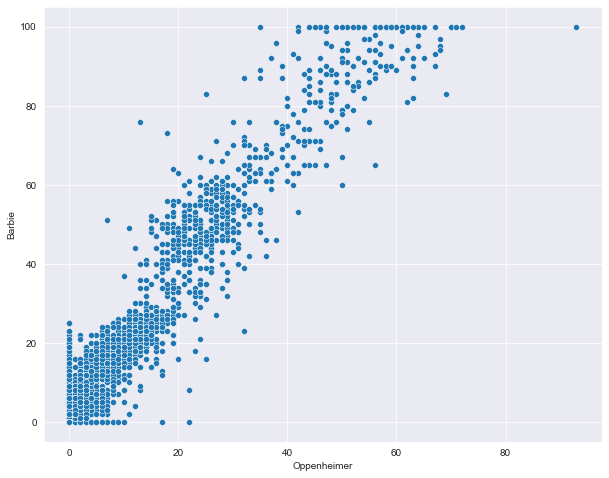

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=state_summary, x='Oppenheimer', y='Barbie')

# Polls
five thirty eight

In [15]:
current_polls = pd.read_csv('../../../data/polls/president_primary_polls.csv')
historical_polls = pd.read_csv('../../../data/polls/president_primary_polls_historical.csv')

C:\Users\graha\AppData\Local\Temp\ipykernel_10556\1921524920.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_polls = pd.read_csv('../../../data/polls/president_primary_polls_historical.csv')


In [16]:
current_polls

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,83319,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,NaN,primary,False,False,NaN,REP,Trump,16651,Donald Trump,58.0
1,83319,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,NaN,primary,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,15.0
2,83319,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,NaN,primary,False,False,NaN,REP,Pence,16638,Mike Pence,7.0
3,83319,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,NaN,primary,False,False,NaN,REP,Haley,16640,Nikki Haley,3.0
4,83319,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,...,NaN,primary,False,False,NaN,REP,T. Scott,16648,Tim Scott,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,68055,1575,Leger,NaN,NaN,Leger,572,Leger,B/C,Online Panel,...,NaN,primary,False,False,NaN,DEM,Abrams,16708,Stacey Abrams,6.0
12161,68055,1575,Leger,NaN,NaN,Leger,572,Leger,B/C,Online Panel,...,NaN,primary,False,False,NaN,DEM,Gillibrand,16667,Kirsten E. Gillibrand,4.0
12162,74404,147,Fabrizio,NaN,NaN,"Fabrizio, Lee & Associates",90,"Fabrizio, Lee & Associates",A/B,NaN,...,NaN,primary,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,37.0
12163,74404,147,Fabrizio,NaN,NaN,"Fabrizio, Lee & Associates",90,"Fabrizio, Lee & Associates",A/B,NaN,...,NaN,primary,False,False,NaN,REP,Rubio,16643,Marco Rubio,26.0


In [19]:
polls_red = current_polls[['pollster', 'methodology', 'state', 'start_date', 'end_date', 
                           'sponsor_candidate', 'sponsor_candidate_party', 'population_full', 
                           'partisan', 'race_id', 'office_type', 'seat_name', 'stage', 'party', 
                           'answer', 'candidate_name', 'pct']]


,pollster,methodology,state,start_date,end_date,sponsor_candidate,sponsor_candidate_party,population_full,partisan,race_id,office_type,seat_name,stage,party,answer,candidate_name,pct
0,Morning Consult,Online Panel,NaN,7/28/23,7/30/23,NaN,NaN,lv-r,NaN,8916,U.S. President,NaN,primary,REP,Trump,Donald Trump,58.0
1,Morning Consult,Online Panel,NaN,7/28/23,7/30/23,NaN,NaN,lv-r,NaN,8916,U.S. President,NaN,primary,REP,DeSantis,Ron DeSantis,15.0
2,Morning Consult,Online Panel,NaN,7/28/23,7/30/23,NaN,NaN,lv-r,NaN,8916,U.S. President,NaN,primary,REP,Pence,Mike Pence,7.0
3,Morning Consult,Online Panel,NaN,7/28/23,7/30/23,NaN,NaN,lv-r,NaN,8916,U.S. President,NaN,primary,REP,Haley,Nikki Haley,3.0
4,Morning Consult,Online Panel,NaN,7/28/23,7/30/23,NaN,NaN,lv-r,NaN,8916,U.S. President,NaN,primary,REP,T. Scott,Tim Scott,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,Leger,Online Panel,NaN,8/4/20,8/7/20,NaN,NaN,lv,NaN,8915,U.S. President,NaN,primary,DEM,Abrams,Stacey Abrams,6.0
12161,Leger,Online Panel,NaN,8/4/20,8/7/20,NaN,NaN,lv,NaN,8915,U.S. President,NaN,primary,DEM,Gillibrand,Kirsten E. Gillibrand,4.0
12162,Fabrizio,NaN,Florida,7/16/19,7/18/19,NaN,NaN,lv-r,NaN,8780,U.S. President,NaN,primary,REP,DeSantis,Ron DeSantis,37.0
12163,Fabrizio,NaN,Florida,7/16/19,7/18/19,NaN,NaN,lv-r,NaN,8780,U.S. President,NaN,primary,REP,Rubio,Marco Rubio,26.0


In [17]:
polls_red.describe()

NameError: name 'polls_red' is not defined